## King County House Sales Project Submission

Please fill out:
* Student name: Jon McCaffrey
* Student pace: full time
* Scheduled project review date/time: 10/28/22 15:00 EST
* Instructor name: Daniel Burdeno
* Blog post URL: https://medium.com/@jonmccaffrey524


In [2]:
# Your code here - remember to use markdown cells for comments as well!

# Initial imports

In [112]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import itertools
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Loaded data, initial EDA

In [4]:
! ls

LICENSE
README.md
data
jons_notebook.ipynb


In [5]:
df_hd = pd.read_csv('.\data\kc_house_data.csv')
df_hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# checking for null values
df_hd.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# obtaining statistics for numeric columns
df_hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# looking at correlation for numeric portion of dataframe
df_hd.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


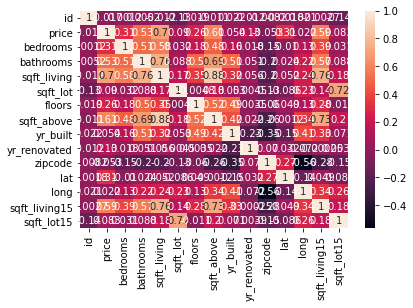

In [10]:
# producing a heatmap of correlations
sns.heatmap(df_hd.corr(), annot=True);

# Investigate Price column

In [11]:
# determining correlation to price prior to any data cleaning
df_hd.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [13]:
# sorting correlation in descending order, by absolute value
df_hd_corrs = df_hd.corr()['price'].map(abs).sort_values(ascending=False)
df_hd_corrs

# for initial modeling, focused on top 4 values of sqft_living, sqft_above, sqft_living15, and bathrooms

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

# Creating models based on correlations above

## Price and sqft_living

In [14]:
# defining variables, y and X_1
y = df_hd['price']
X_1 = sm.add_constant(df_hd['sqft_living'])

In [15]:
# fitting model and producing summary
sm.OLS(endog=y, exog=X_1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:16:57   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Noted R^2 0.493, low probability of F-statistic, low p-value of sqft_living
However, high JB, low prob  JB

## Price and sqft_above

In [16]:
X_2 = sm.add_constant(df_hd['sqft_above'])
sm.OLS(endog=y, exog=X_2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:16:57   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Noted R^2 0.366 low probability of F-statistic, low p-value of sqft_above
However, high JB, low prob  JB again

## Price and sqft_living15

In [17]:
X_3 = sm.add_constant(df_hd['sqft_living15'])
sm.OLS(endog=y, exog=X_3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:16:57   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Noted R^2 0.343, low probability of F-statistic, low p-value of sqft_living15
However, high JB, low prob JB again

## Price and bathrooms

In [18]:
df_hd['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [19]:
# How can you have 0.25 of a bathroom?
# https://rosskaplan.com/2018/02/the-case-for-the-1-25-bath-or-the-1-375-bath/

In [20]:
X_4 = sm.add_constant(df_hd['bathrooms'])
sm.OLS(endog=y, exog=X_4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:16:57   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Noted R^2 0.277, low probability of F-statistic, low p-value of bathrooms
However, high JB, low prob JB again

# Looking for Normality in comparisons above

## For numeric values of sqft_living, sqft_above, sqft_living15, and bathrooms

Andrew doing overall linear modeling and checking independence, as part of checking LINH assumptions

In [21]:
# creating smaller dataframe with only those 4 columns

df_norm = pd.concat([df_hd['sqft_living'], df_hd['sqft_above'], df_hd['sqft_living15'], df_hd['bathrooms']], axis=1)
df_norm.head()

,sqft_living,sqft_above,sqft_living15,bathrooms
0,1180,1180,1340,1.00
1,2570,2170,1690,2.25
2,770,770,2720,1.00
3,1960,1050,1360,3.00
4,1680,1680,1800,2.00


In [200]:
# instantiating with StandardScaler

X_norm_int = df_norm
ss = StandardScaler().fit(X_norm_int)

X_norm_int_scaled = ss.transform(X_norm_int)

In [201]:
# adding constant to X, defining y

X_norm_int_c = sm.add_constant(X_norm_int_scaled)
y = df_hd['price']

In [202]:
# creating and fitting the model

model = sm.OLS(endog=y, exog=X_norm_int_c).fit()

In [203]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     5423.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:07:15   Log-Likelihood:            -2.9988e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21592   BIC:                         5.998e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1765.745    305.988      0.000    5.37e+05    5.44e+05
x1          2.472e+05   4320.373     57.223      0.000    2.39e+05    2.56e+05
x2         -3.067e+04   3770.054     -8.134      0.000   -3.81e+04   -2.33e+04
x3          5.156e+04   2766.965     18.632      0.000    4.61e+04     5.7e+04
x4         -1968.2489   2705.068     -0.728      0.467   -7270.381    3333.883
==============================================================================
Omnibus:                    15583.002   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           691776.825
Skew:                           2.983   Prob(JB):                         0.00
Kurtosis:                      30.077   Cond. No.                         5.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

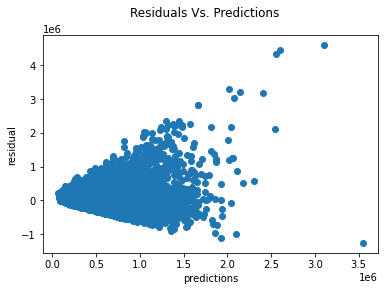

In [25]:
# scatterplot to assess general linearity

model_preds = model.predict(X_norm_int_c)
resids = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('predictions')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

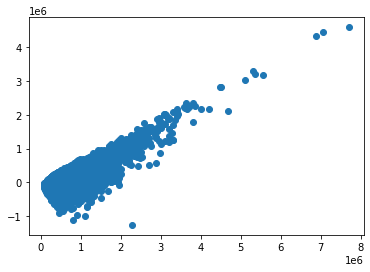

In [26]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y, resids);

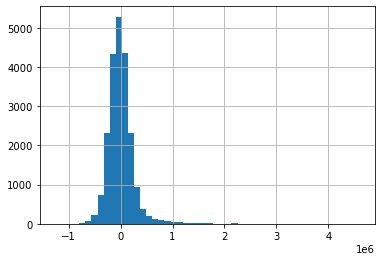

In [27]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids.hist(bins=50);

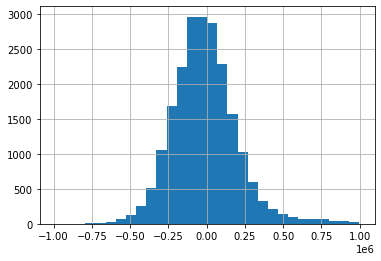

In [28]:
# a closer view

resids[abs(resids) < 1000000].hist(bins=30);

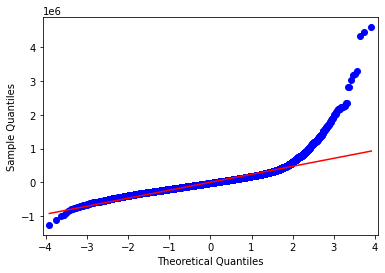

In [29]:
# QQ plot to assess normality as well.  This demonstrates significant divergences

sm.qqplot(resids, line='r');

In [30]:
# JB tests shows huge test statistic and tiny p-value.  So we would have to reject the null hypothesis 
# that the errors are normally distributed

model.summary().tables[2]

Omnibus:,15583.002,Durbin-Watson:,1.982
Prob(Omnibus):,0.000,Jarque-Bera (JB):,691776.825
Skew:,2.983,Prob(JB):,0.00
Kurtosis:,30.077,Cond. No.,5.31


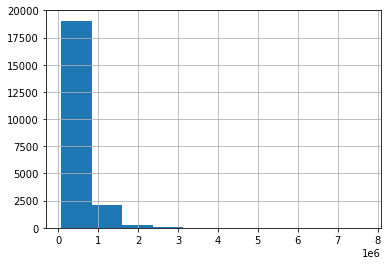

In [31]:
# note: very right-tailed.  
# It's possible that removing outliers at the high end could improve normal distribution, 
# or perhaps using natural log will help make it more linear?

y.hist();

# Removing outliers at the high end of target value 'price'

Our initial review of assumptions for our linear regression model, based on the top 4 highest-correlated factors listed above, failed to find a normal distribution of errors.  We decided to further investigate the target value 'price' to see if removing outliers at the high end would improve our model

In [32]:
# looking at the properties of the top 25 highest priced homes
df_hd.sort_values(by='price', ascending=False).head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,NO,GOOD,...,13 Mansion,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,YES,AVERAGE,...,11 Excellent,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,...,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,NO,NONE,...,13 Mansion,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,NO,EXCELLENT,...,12 Luxury,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,YES,NaN,...,12 Luxury,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,YES,EXCELLENT,...,12 Luxury,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,YES,EXCELLENT,...,12 Luxury,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,YES,EXCELLENT,...,12 Luxury,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,NO,NONE,...,12 Luxury,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


In [33]:
df_hd['price'].sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64

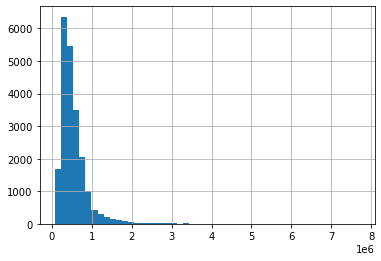

In [34]:
# quick histogram to visualize potential skewness
df_hd['price'].hist(bins=50);

In [35]:
# calculating 95th percentile of price as a potential cutoff for outliers
rvs_price = stats.norm(loc=df_hd['price'].mean(), scale=df_hd['price'].std())
rvs_price.ppf(0.95)

1144563.3911777749

In [36]:
# calculating interquartile range for price
IQR_price = rvs_price.ppf(0.75) - rvs_price.ppf(0.25)
IQR_price

495572.0900939775

In [38]:
# calculating outliers via IQR range
upper_price = rvs_price.ppf(0.75) + (1.5*IQR_price)
upper_price

1531440.7536935345

We decided to use the IQR calculation above for 'upper_price' as our cutoff for removing outliers, rather than th 95% calculation above

In [39]:
lower_price = rvs_price.ppf(0.25) - (1.5*IQR_price)
lower_price
# this yields a negative number, so we won't be eliminating any values at the lower end of price data

-450847.60668237554

In [40]:
# creating a copy of df
df_lp = df_hd.copy()
df_lp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [42]:
# creating a dataframe (df_lp for 'lower price') with price values above the upper_price threshold removed
df_lp.drop(df_lp[df_lp['price'] >= upper_price].index, inplace=True)

In [43]:
df_lp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [44]:
len(df_hd) - len(df_lp)

499

In [45]:
499 / (len(df_hd))

0.02310506088808631

That removed 499 values (2.3%)

# Now re-running models from above with price outliers removed

## Lower price and sqft_living

In [46]:
# defining variables, y and X_1
y = df_lp['price']
X_1_lp = sm.add_constant(df_lp['sqft_living'])

In [47]:
# fitting model and producing summary
sm.OLS(endog=y, exog=X_1_lp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 1.615e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:18:45   Log-Likelihood:            -2.8616e+05
No. Observations:               21098   AIC:                         5.723e+05
Df Residuals:                   21096   BIC:                         5.723e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.931e+04   3424.566     29.000      0.000    9.26e+04    1.06e+05
sqft_living   199.0499      1.566    127.097      0.000     195.980     202.120
==============================================================================
Omnibus:                     2987.241   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5609.251
Skew:                           0.904   Prob(JB):                         0.00
Kurtosis:                       4.764   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R^2 decreased!  Other values interpreted above remain consistent

## Lower price and sqft_above

In [48]:
X_2_lp = sm.add_constant(df_lp['sqft_above'])
sm.OLS(endog=y, exog=X_2_lp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9684.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:18:45   Log-Likelihood:            -2.8817e+05
No. Observations:               21098   AIC:                         5.764e+05
Df Residuals:                   21096   BIC:                         5.764e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.819e+05   3553.410     51.187      0.000    1.75e+05    1.89e+05
sqft_above   183.5848      1.866     98.409      0.000     179.928     187.241
==============================================================================
Omnibus:                     3754.388   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7317.620
Skew:                           1.090   Prob(JB):                         0.00
Kurtosis:                       4.890   Cond. No.                     4.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- again R^2 decreased

## Lower price and sqft_living15

In [49]:
X_3_lp = sm.add_constant(df_lp['sqft_living15'])
sm.OLS(endog=y, exog=X_3_lp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:18:45   Log-Likelihood:            -2.8763e+05
No. Observations:               21098   AIC:                         5.753e+05
Df Residuals:                   21096   BIC:                         5.753e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.76e+04   4402.042     13.085      0.000     4.9e+04    6.62e+04
sqft_living15   227.4196      2.137    106.438      0.000     223.232     231.608
==============================================================================
Omnibus:                     4227.718   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9356.357
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       5.302   Cond. No.                     6.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R^2 with slight increase

## Lower price and bathrooms

In [50]:
X_4_lp = sm.add_constant(df_lp['bathrooms'])
sm.OLS(endog=y, exog=X_4_lp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     6660.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:18:45   Log-Likelihood:            -2.8927e+05
No. Observations:               21098   AIC:                         5.785e+05
Df Residuals:                   21096   BIC:                         5.786e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.54e+05   4523.109     34.053      0.000    1.45e+05    1.63e+05
bathrooms   1.672e+05   2049.060     81.606      0.000    1.63e+05    1.71e+05
==============================================================================
Omnibus:                     3468.241   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6249.390
Skew:                           1.052   Prob(JB):                         0.00
Kurtosis:                       4.639   Cond. No.                         7.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R^2 also decreased here.  So that's 3 out of 4 highly correlated features that have decreased R^2 with the removal of the highest-priced 2.3% of homes.  

# Rechecking for Normality

In [51]:
# creating smaller dataframe with only those 4 columns

df_norm_lp = pd.concat([df_lp['sqft_living'], df_lp['sqft_above'], df_lp['sqft_living15'], df_lp['bathrooms']], axis=1)
df_norm_lp.head()

,sqft_living,sqft_above,sqft_living15,bathrooms
0,1180,1180,1340,1.00
1,2570,2170,1690,2.25
2,770,770,2720,1.00
3,1960,1050,1360,3.00
4,1680,1680,1800,2.00


In [204]:
# instantiating with StandardScaler

X_norm_lp = df_norm_lp
ss_lp = StandardScaler().fit(X_norm_lp)

X_norm_lp_scaled = ss_lp.transform(X_norm_lp)

In [207]:
# adding constant to X, defining y

X_norm_lp_c = sm.add_constant(X_norm_lp_scaled)
y_lp = df_lp['price']

In [209]:
# creating and fitting the model

model_lp = sm.OLS(endog=y_lp, exog=X_norm_lp_c).fit()

In [109]:
model_lp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     4454.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:06:24   Log-Likelihood:            -2.8570e+05
No. Observations:               21098   AIC:                         5.714e+05
Df Residuals:                   21093   BIC:                         5.715e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.023e+05   1266.930    396.433      0.000       5e+05    5.05e+05
x1           1.37e+05   2939.538     46.596      0.000    1.31e+05    1.43e+05
x2         -2.535e+04   2575.218     -9.842      0.000   -3.04e+04   -2.03e+04
x3          6.021e+04   1973.383     30.512      0.000    5.63e+04    6.41e+04
x4          5825.0778   1866.603      3.121      0.002    2166.394    9483.762
==============================================================================
Omnibus:                     3003.858   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5590.329
Skew:                           0.912   Prob(JB):                         0.00
Kurtosis:                       4.742   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

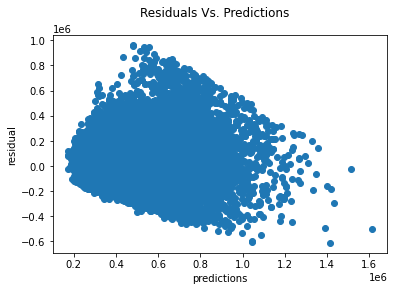

In [55]:
# scatterplot to assess general linearity

model_preds_lp = model_lp.predict(X_norm_lp_c)
resids_lp = y_lp - model_preds_lp

fig, ax = plt.subplots()

ax.scatter(model_preds_lp, resids_lp)
ax.set_xlabel('predictions')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

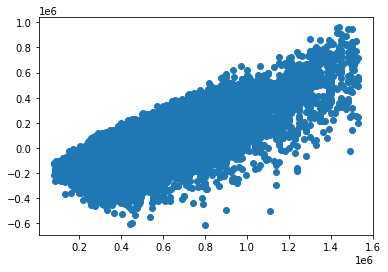

In [56]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y_lp, resids_lp);

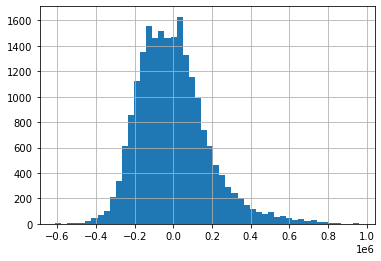

In [57]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids_lp.hist(bins=50);

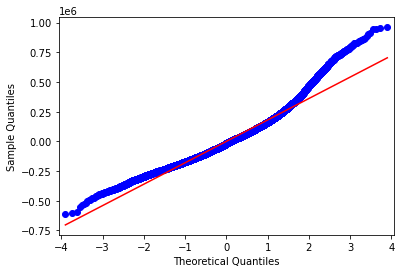

In [58]:
# QQ plot to assess normality as well.  This demonstrates significant divergences

sm.qqplot(resids_lp, line='r');

In [59]:
# JB test shows much reduced test-statistic, but still large and still a tiny p-value.  So we would have to reject the null hypothesis 
# that the errors are normally distributed.  Cond. No.  slightly improved but let's investigate the other numeric features
# that we've been focusing on (sqft_living, sqft_above, sqft_living15, and bathrooms)

model_lp.summary().tables[2]

Omnibus:,3003.858,Durbin-Watson:,1.972
Prob(Omnibus):,0.000,Jarque-Bera (JB):,5590.329
Skew:,0.912,Prob(JB):,0.00
Kurtosis:,4.742,Cond. No.,4.98


# Checking for outliers in subset numeric columns

In [60]:
# returning to original data set, not the 'lower price' dataframe
df_num = pd.concat([df_hd['price'], df_hd['sqft_living'], df_hd['sqft_above'], df_hd['sqft_living15'], df_hd['bathrooms']], axis=1)
df_num.head()               

,price,sqft_living,sqft_above,sqft_living15,bathrooms
0,221900.0,1180,1180,1340,1.00
1,538000.0,2570,2170,1690,2.25
2,180000.0,770,770,2720,1.00
3,604000.0,1960,1050,1360,3.00
4,510000.0,1680,1680,1800,2.00


In [61]:
df_num.corr()['price']

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
Name: price, dtype: float64

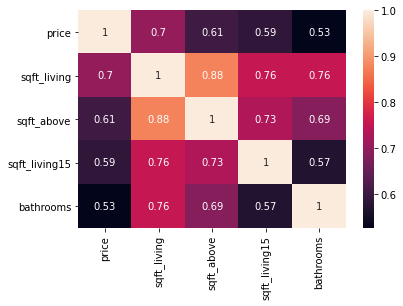

In [62]:
sns.heatmap(df_num.corr(), annot=True);
# I had missed how likely multicollinearity would be across many of these 
# variables.  

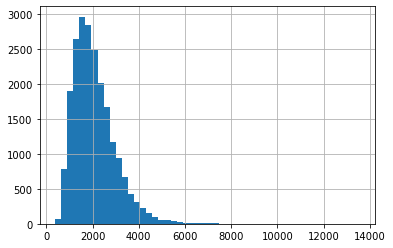

In [63]:
df_hd['sqft_living'].hist(bins=50);

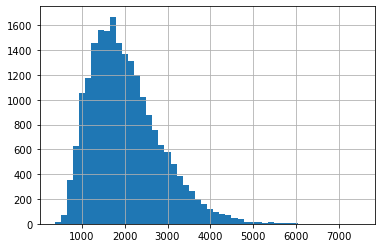

In [64]:
df_lp['sqft_living'].hist(bins=50);

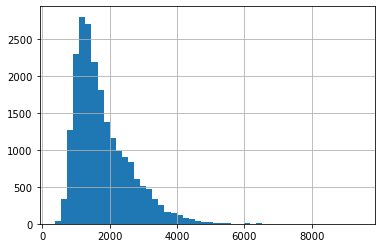

In [65]:
df_hd['sqft_above'].hist(bins=50);

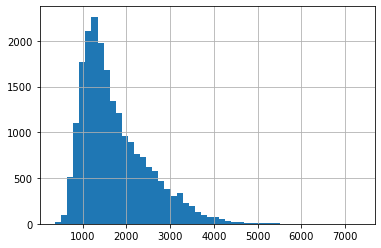

In [66]:
df_lp['sqft_above'].hist(bins=50);

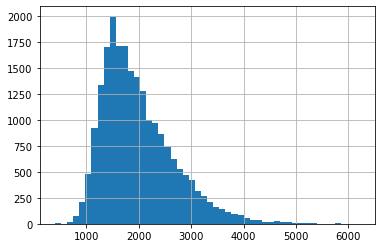

In [67]:
df_hd['sqft_living15'].hist(bins=50);

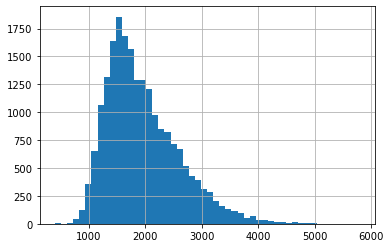

In [68]:
df_lp['sqft_living15'].hist(bins=50);

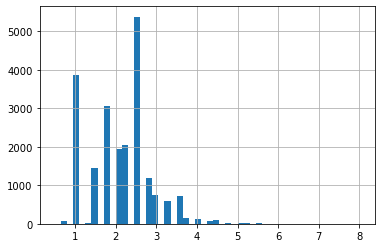

In [69]:
df_hd['bathrooms'].hist(bins=50);

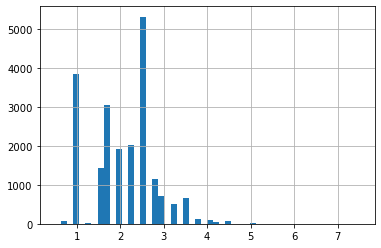

In [70]:
df_lp['bathrooms'].hist(bins=50);

# Investigating potential comparisons based on resale

- Looking at how many house id's are repeated in the dataframe, indicating resale

In [71]:
resale = df_hd['id'].value_counts()
type(resale)

pandas.core.series.Series

In [79]:
len(df_hd['id']) - df_hd['id'].nunique()

177

In [80]:
resale[:180]

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
1788900230    2
537000416     1
5089700720    1
4187000250    1
6071200400    1
Name: id, Length: 180, dtype: int64

In [ ]:
# houses_resold = []

# for x in df_hd['id']:
    # houses_resold.append(x)
    # if df_hd['id'].value_counts() > 1
    
# had trouble creating a for loop to create a separate list of 'houses_resold', and it's only 177 values out of a ~25,000 dataset

# Investigating categorical variables

- would multilinear regression between only ONE of the numeric variables above, and a categorical variable that we haven't worked with yet, yield a higher R^2 than without multicollinearity?

In [81]:
df_hd['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [82]:
df_hd['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [83]:
df_hd['waterfront'].value_counts()
# has a lot of nulls (seen with initial EDA) and vast majority of values are NOs

NO     19075
YES      146
Name: waterfront, dtype: int64

- Should we treat zip code as a categorical value?  Then associate price to each zip code?  There are 70 (!) total
- Also considering creating calculations of lat & long relative to a defined lat & long of Seattle city center to investigate price differences relative to distance from city center
- After all, real estate is all about "location, location, location"

In [93]:
zips = df_hd['zipcode'].value_counts()
zips

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [85]:
zips[:50]

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
98065    308
98122    290
98146    288
98028    283
98008    283
98040    282
98198    280
98003    280
98072    273
98031    273
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
Name: zipcode, dtype: int64

- Andrew to investigate condition, I'll take grade.  I'll dummy out grade just relative to price first

## Creating a dataframe of only price and grade, from original data set with ALL sale prices

In [89]:
df_price_grade = pd.concat([df_hd['price'], df_hd['grade']], axis=1)
df_price_grade

,price,grade
0,221900.0,7 Average
1,538000.0,7 Average
2,180000.0,6 Low Average
3,604000.0,7 Average
4,510000.0,8 Good
...,...,...
21592,360000.0,8 Good
21593,400000.0,8 Good
21594,402101.0,7 Average
21595,400000.0,8 Good


In [91]:
dummy_price_grade = pd.get_dummies(df_price_grade, drop_first=True)
dummy_price_grade

,price,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0,0,0,0,0,0,0,1,0,0
2,180000.0,0,0,0,0,0,0,1,0,0,0
3,604000.0,0,0,0,0,0,0,0,1,0,0
4,510000.0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,0,0,0,0,0,0,0,0,1,0
21593,400000.0,0,0,0,0,0,0,0,0,1,0
21594,402101.0,0,0,0,0,0,0,0,1,0,0
21595,400000.0,0,0,0,0,0,0,0,0,1,0


In [92]:
dummy_price_grade.corr()['price']

price                  1.000000
grade_11 Excellent     0.357589
grade_12 Luxury        0.291068
grade_13 Mansion       0.211806
grade_3 Poor          -0.005155
grade_4 Low           -0.031618
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209463
grade_7 Average       -0.316053
grade_8 Good           0.004576
grade_9 Better         0.235859
Name: price, dtype: float64

- Unsurprisingly, the highest grades are positively correlated with price, but interestingly 'Average' is slightly negatively correlated and yet 'Better' is positively correlated.  What would it take for a home to bump from average to better?

- https://budgeting.thenest.com/difference-value-appraisal-good-vs-average-23510.html
- https://www.sapling.com/12067706/grade-mean-tax-assessment#:~:text=Grade%20is%20an%20evaluation%20of%20the%20construction%20materials,Entry-level%20appraisers%20usually%20make%20the%20initial%20grade%20estimate.

## Starting to compare numeric variables investigated above to this price/grade dummy set

In [94]:
df_p_g_sqft_living = pd.concat([dummy_price_grade, df_hd['sqft_living']], axis=1)

In [97]:
df_p_g_sqft_living.corr()['sqft_living']
# price is still the highest correlation.  Would it be different if I created subsets of sqft_living?
# Note a big jump from 'average' to 'better' again

price                  0.701917
grade_11 Excellent     0.345964
grade_12 Luxury        0.238136
grade_13 Mansion       0.144424
grade_3 Poor          -0.011565
grade_4 Low           -0.053935
grade_5 Fair          -0.127198
grade_6 Low Average   -0.312486
grade_7 Average       -0.358915
grade_8 Good           0.071115
grade_9 Better         0.318499
sqft_living            1.000000
Name: sqft_living, dtype: float64

In [98]:
df_p_g_sqft_above = pd.concat([dummy_price_grade, df_hd['sqft_above']], axis=1)

In [99]:
df_p_g_sqft_above.corr()['sqft_above']
# same findings as above, with big jump from 'average' to 'good'

price                  0.605368
grade_11 Excellent     0.342198
grade_12 Luxury        0.222177
grade_13 Mansion       0.126666
grade_3 Poor          -0.010429
grade_4 Low           -0.047669
grade_5 Fair          -0.108543
grade_6 Low Average   -0.280761
grade_7 Average       -0.387255
grade_8 Good           0.059423
grade_9 Better         0.343388
sqft_above             1.000000
Name: sqft_above, dtype: float64

In [100]:
df_p_g_sqft_living15 = pd.concat([dummy_price_grade, df_hd['sqft_living15']], axis=1)

In [101]:
df_p_g_sqft_living15.corr()['sqft_living15']
# same

price                  0.585241
grade_11 Excellent     0.309442
grade_12 Luxury        0.184882
grade_13 Mansion       0.072304
grade_3 Poor          -0.006421
grade_4 Low           -0.025814
grade_5 Fair          -0.094154
grade_6 Low Average   -0.281415
grade_7 Average       -0.378185
grade_8 Good           0.073372
grade_9 Better         0.339543
sqft_living15          1.000000
Name: sqft_living15, dtype: float64

In [102]:
df_p_g_bathrooms = pd.concat([dummy_price_grade, df_hd['bathrooms']], axis=1)

In [103]:
df_p_g_bathrooms.corr()['bathrooms']
# same

price                  0.525906
grade_11 Excellent     0.247293
grade_12 Luxury        0.159734
grade_13 Mansion       0.095118
grade_3 Poor          -0.012087
grade_4 Low           -0.055599
grade_5 Fair          -0.138740
grade_6 Low Average   -0.366185
grade_7 Average       -0.313457
grade_8 Good           0.189426
grade_9 Better         0.264756
bathrooms              1.000000
Name: bathrooms, dtype: float64

- Would suggesting renovations such as adding a bathroom, or increasing by "X" sqft_living be significantly correlated with increased price?  Most likely.  By what percentage?  (Asking a predictive question, not needed).  What effect on price can we infer from an additional bathroom / sqft_living, how does that associate with grade or condition to strengthen overall model?

# Ordinal encoding 'condition'

- Let's return to the full data set, using ALL numeric variables...
    - minus the unnecessary ones of yr_renovated --> too many nulls
    - id --> unique ID but numbers are not significant
    - and zip code --> should be considered categorical as the numbers signify a category
- ...instead of focusing only on a smaller subset of higher correlated numeric variables (sqft_living, sqft_above, sqft_living15, and bathrooms)
- Ordinal encode condition (fewer categories, relatively more clear defnition than "grade")
- Concatenate into dataframe, standardize, run models, check assumptions

In [110]:
# creating df of only numerics
df_hd_numeric_all = df_hd.select_dtypes(include='number')

In [111]:
# dropping unnecessary numeric columns listed above
df_hd_numeric = df_hd_numeric_all.drop(['price', 'yr_renovated', 'zipcode', 'id'], axis=1)

In [114]:
# review condition categories
df_hd['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [136]:
# double check initial condition ratings for df_hd.head()
pd.options.display.max_columns = None
df_hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [120]:
# ordinal encoding condition
categories = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]
ords = OrdinalEncoder(categories=categories)

In [121]:
# create dataframe of only 'condition'
cond_df = pd.DataFrame(df_hd['condition'])

In [124]:
# fit to ordinal encoder and transform
ords.fit(cond_df)
cond_ords = ords.transform(cond_df)
cond_ords

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [129]:
# create new dataframe with ordinal encoding taking place of grade
# how to title column?
cond_encoded = pd.DataFrame(ords.transform(cond_df))

In [137]:
# concatenate desired numeric variables and ordinal encoded condition
df_hd_num_ords = pd.concat([df_hd_numeric, cond_encoded], axis=1)
df_hd_num_ords.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,0
0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,2.0
1,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,2.0
2,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,2.0
3,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,4.0
4,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,2.0


In [197]:
# instantiating with StandardScaler
ss_ords = StandardScaler().fit(df_hd_num_ords)
df_hd_num_ords_scaled = ss_ords.transform(df_hd_num_ords)

In [198]:
# adding constant to X, defining y
df_hd_num_ords_c = sm.add_constant(df_hd_num_ords_scaled)
y = df_hd['price']

In [199]:
# creating and fitting the model for all relevant numerics & 
# ordinal encoded condition
model_num_ords = sm.OLS(endog=y, exog=df_hd_num_ords_c).fit()

In [143]:
model_num_ords.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     3001.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:47:41   Log-Likelihood:            -2.9679e+05
No. Observations:               21597   AIC:                         5.936e+05
Df Residuals:                   21584   BIC:                         5.937e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1530.746    352.963      0.000    5.37e+05    5.43e+05
x1         -5.368e+04   1932.518    -27.780      0.000   -5.75e+04   -4.99e+04
x2          4.746e+04   2772.254     17.121      0.000     4.2e+04    5.29e+04
x3          2.005e+05   4349.837     46.095      0.000    1.92e+05    2.09e+05
x4          8287.7368   2216.364      3.739      0.000    3943.500    1.26e+04
x5          1.271e+04   2149.793      5.911      0.000    8494.168    1.69e+04
x6          3.078e+04   3941.320      7.809      0.000    2.31e+04    3.85e+04
x7         -6.459e+04   2173.243    -29.720      0.000   -6.88e+04   -6.03e+04
x8          8.235e+04   1595.261     51.622      0.000    7.92e+04    8.55e+04
x9         -3.652e+04   1839.347    -19.856      0.000   -4.01e+04   -3.29e+04
x10         6.349e+04   2471.860     25.686      0.000    5.86e+04    6.83e+04
x11        -1.148e+04   2234.764     -5.137      0.000   -1.59e+04   -7098.682
x12         2.081e+04   1674.970     12.422      0.000    1.75e+04    2.41e+04
==============================================================================
Omnibus:                    17738.971   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1208594.855
Skew:                           3.504   Prob(JB):                         0.00
Kurtosis:                      38.972   Cond. No.                         7.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

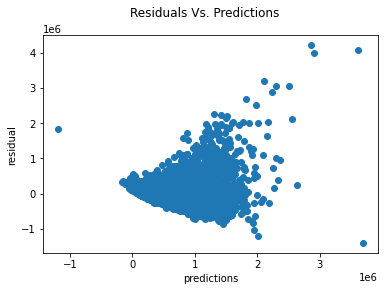

In [144]:
model_preds_num_ords = model_num_ords.predict(df_hd_num_ords_c)
resids_num_ords = y - model_preds_num_ords

fig, ax = plt.subplots()

ax.scatter(model_preds_num_ords, resids_num_ords)
ax.set_xlabel('predictions')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

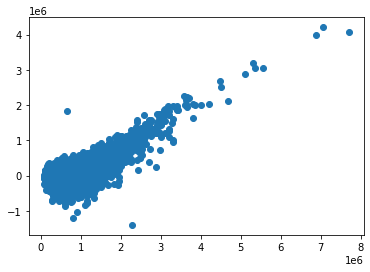

In [145]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y, resids_num_ords);

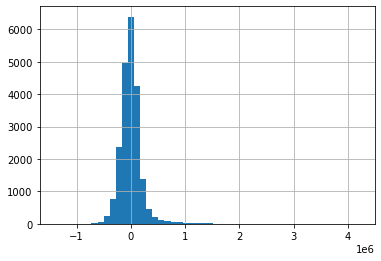

In [148]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids_num_ords.hist(bins=50);

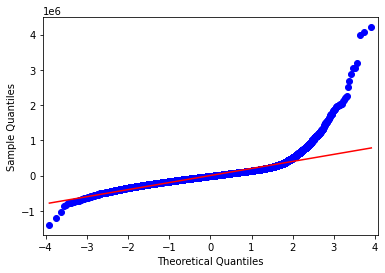

In [149]:
# QQ plot to assess normality as well.  This demonstrates significant 
# divergences

sm.qqplot(resids_num_ords, line='r');

In [150]:
model_num_ords.summary().tables[2]

Omnibus:,17738.971,Durbin-Watson:,1.999
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1208594.855
Skew:,3.504,Prob(JB):,0.00
Kurtosis:,38.972,Cond. No.,7.67


In [153]:
# looking at largest coeff - sqft_living
df_hd_num_ords['sqft_living'].mean()

2080.3218502569803

In [152]:
df_hd_num_ords['sqft_living'].std()

918.1061250800805

In [ ]:
# order of coefficients
# sqft_living
# lat (equates to )
# then neg of yr built
# sqft_living15

In [165]:
model_num_ords.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.403e+05,1530.746,352.963,0.000,5.37e+05,5.43e+05
x1,-5.368e+04,1932.518,-27.780,0.000,-5.75e+04,-4.99e+04
x2,4.746e+04,2772.254,17.121,0.000,4.2e+04,5.29e+04
x3,2.005e+05,4349.837,46.095,0.000,1.92e+05,2.09e+05
x4,8287.7368,2216.364,3.739,0.000,3943.500,1.26e+04
x5,1.271e+04,2149.793,5.911,0.000,8494.168,1.69e+04
x6,3.078e+04,3941.320,7.809,0.000,2.31e+04,3.85e+04
x7,-6.459e+04,2173.243,-29.720,0.000,-6.88e+04,-6.03e+04
x8,8.235e+04,1595.261,51.622,0.000,7.92e+04,8.55e+04
x9,-3.652e+04,1839.347,-19.856,0.000,-4.01e+04,-3.29e+04


In [ ]:
model_num_ords.outlier_test()

# Repeat assessment with lower price dataframe and adding in lat/long column from Andrew

In [171]:
# checking shape of newest df with dropped numerics, ord encoded condition
df_hd_num_ords.shape

(21597, 12)

In [173]:
# compared to original df.  All good for total rows
df_hd.shape

(21597, 21)

In [212]:
#create numeric df with 'id', 'yr_renovated' and 'zipcode' dropped. 
# BUT keeping price 
df_hd_num_price = df_hd_numeric_all.drop(['yr_renovated', 'zipcode', 'id'], axis=1)
df_hd_num_price.shape

(21597, 12)

In [187]:
# info from Andrew, with tweaks for my dataframe variable names
# installing and importing haversine library for geo-location calculations
!pip install haversine
import haversine as hs

In [213]:
# initializing and formatting location variables
loc1 = list(zip(df_hd_num_price['lat'], df_hd_num_price['long']))
loc2 = (47.6050, -122.3344)
# creating new dataframe from original df_hd with new column for house distance from downtown seattle
df_hd_w_loc = df_hd_num_price.copy()
df_hd_w_loc['Distance_from_DTSeattle'] = [hs.haversine((x,y), loc2, unit='mi') for x,y in loc1]
df_hd_w_loc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,7.418041
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,8.046810
2,180000.0,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,10.323554
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,6.427255
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,13.504920


In [214]:
# adding in ordinal encoded condition from above
df_hd_ord_loc = pd.concat([df_hd_w_loc, cond_encoded], axis=1)
df_hd_ord_loc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,7.418041,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,8.046810,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,10.323554,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,6.427255,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,13.504920,2.0


In [215]:
# relevant numeric df (with price) and with ordinal encoded condition & loc
df_hd_ord_loc.shape

(21597, 14)

In [216]:
df_42 = df_hd_ord_loc.copy()

In [217]:
# now removing outlier high prices, as defined WAAAAAAY higher up in this JN
df_hd_ord_loc_lp = df_42.drop(df_42[df_42['price'] >= upper_price].index)
df_hd_ord_loc_lp.shape

(21098, 14)

In [218]:
# same 499 values removed as before
df_hd_ord_loc.shape[0] - df_hd_ord_loc_lp.shape[0]

499

In [227]:
df_x_drop = df_hd_ord_loc_lp.drop('price', axis=1)

In [228]:
ss_ords_loc_lp = StandardScaler().fit(df_x_drop)
df_hd_ord_loc_lp_scaled = ss_ords_loc_lp.transform(df_x_drop)

In [229]:
df_hd_ord_loc_lp_c = sm.add_constant(df_hd_ord_loc_lp_scaled)
y = df_hd_ord_loc_lp['price']

In [230]:
model_num_ords_loc_lp = sm.OLS(endog=y, exog=df_hd_ord_loc_lp_c).fit()

In [231]:
model_num_ords_loc_lp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     3552.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:44:53   Log-Likelihood:            -2.7992e+05
No. Observations:               21098   AIC:                         5.599e+05
Df Residuals:                   21084   BIC:                         5.600e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.023e+05    963.559    521.247      0.000       5e+05    5.04e+05
x1         -2.272e+04   1226.032    -18.530      0.000   -2.51e+04   -2.03e+04
x2           2.78e+04   1690.736     16.441      0.000    2.45e+04    3.11e+04
x3          9.739e+04   2603.448     37.407      0.000    9.23e+04    1.02e+05
x4          1.283e+04   1382.217      9.285      0.000    1.01e+04    1.55e+04
x5          1.184e+04   1390.137      8.520      0.000    9119.475    1.46e+04
x6          2.577e+04   2404.544     10.715      0.000    2.11e+04    3.05e+04
x7         -3.053e+04   1417.616    -21.539      0.000   -3.33e+04   -2.78e+04
x8          3.489e+04   1324.836     26.336      0.000    3.23e+04    3.75e+04
x9          3.158e+04   1514.377     20.853      0.000    2.86e+04    3.45e+04
x10         6.249e+04   1555.928     40.161      0.000    5.94e+04    6.55e+04
x11         1247.4441   1400.334      0.891      0.373   -1497.318    3992.206
x12            -1e+05   1852.205    -53.991      0.000   -1.04e+05   -9.64e+04
x13         2.051e+04   1053.042     19.482      0.000    1.85e+04    2.26e+04
==============================================================================
Omnibus:                     4347.034   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13385.792
Skew:                           1.061   Prob(JB):                         0.00
Kurtosis:                       6.274   Cond. No.                         7.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

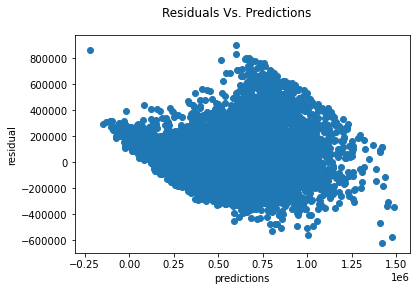

In [232]:
model_preds_num_ords_loc_lp = model_num_ords_loc_lp.predict(df_hd_ord_loc_lp_c)
resids_num_ords_loc_lp = y - model_preds_num_ords_loc_lp

fig, ax = plt.subplots()

ax.scatter(model_preds_num_ords_loc_lp, resids_num_ords_loc_lp)
ax.set_xlabel('predictions')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

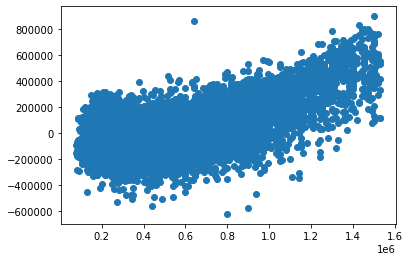

In [233]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y, resids_num_ords_loc_lp);

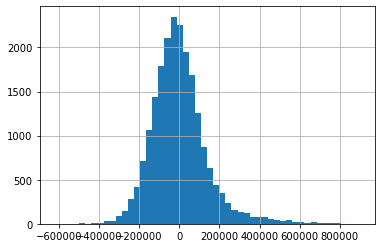

In [234]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids_num_ords_loc_lp.hist(bins=50);

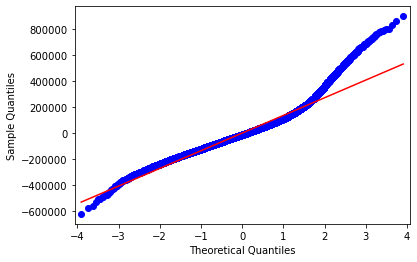

In [235]:
sm.qqplot(resids_num_ords_loc_lp, line='r');

In [236]:
# upper portion of table with ALL prices in, and no LOC
model_num_ords.summary().tables[0]

Dep. Variable:,price,R-squared:,0.625
Model:,OLS,Adj. R-squared:,0.625
Method:,Least Squares,F-statistic:,3001.
Date:,"Tue, 25 Oct 2022",Prob (F-statistic):,0.00
Time:,17:49:43,Log-Likelihood:,-2.9679e+05
No. Observations:,21597,AIC:,5.936e+05
Df Residuals:,21584,BIC:,5.937e+05
Df Model:,12,,
Covariance Type:,nonrobust,,


In [237]:
# most recent model, removed outlier prices and added LOC
model_num_ords_loc_lp.summary().tables[0]

Dep. Variable:,price,R-squared:,0.687
Model:,OLS,Adj. R-squared:,0.686
Method:,Least Squares,F-statistic:,3552.
Date:,"Tue, 25 Oct 2022",Prob (F-statistic):,0.00
Time:,17:49:47,Log-Likelihood:,-2.7992e+05
No. Observations:,21098,AIC:,5.599e+05
Df Residuals:,21084,BIC:,5.600e+05
Df Model:,13,,
Covariance Type:,nonrobust,,


In [239]:
# all prices, no LOC. All coeffs significant
model_num_ords.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.403e+05,1530.746,352.963,0.000,5.37e+05,5.43e+05
x1,-5.368e+04,1932.518,-27.780,0.000,-5.75e+04,-4.99e+04
x2,4.746e+04,2772.254,17.121,0.000,4.2e+04,5.29e+04
x3,2.005e+05,4349.837,46.095,0.000,1.92e+05,2.09e+05
x4,8287.7368,2216.364,3.739,0.000,3943.500,1.26e+04
x5,1.271e+04,2149.793,5.911,0.000,8494.168,1.69e+04
x6,3.078e+04,3941.320,7.809,0.000,2.31e+04,3.85e+04
x7,-6.459e+04,2173.243,-29.720,0.000,-6.88e+04,-6.03e+04
x8,8.235e+04,1595.261,51.622,0.000,7.92e+04,8.55e+04
x9,-3.652e+04,1839.347,-19.856,0.000,-4.01e+04,-3.29e+04


In [238]:
# most recent model, all prices, added LOC.  Now sqft_lot15 is not significant
model_num_ords_loc_lp.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.023e+05,963.559,521.247,0.000,5e+05,5.04e+05
x1,-2.272e+04,1226.032,-18.530,0.000,-2.51e+04,-2.03e+04
x2,2.78e+04,1690.736,16.441,0.000,2.45e+04,3.11e+04
x3,9.739e+04,2603.448,37.407,0.000,9.23e+04,1.02e+05
x4,1.283e+04,1382.217,9.285,0.000,1.01e+04,1.55e+04
x5,1.184e+04,1390.137,8.520,0.000,9119.475,1.46e+04
x6,2.577e+04,2404.544,10.715,0.000,2.11e+04,3.05e+04
x7,-3.053e+04,1417.616,-21.539,0.000,-3.33e+04,-2.78e+04
x8,3.489e+04,1324.836,26.336,0.000,3.23e+04,3.75e+04
x9,3.158e+04,1514.377,20.853,0.000,2.86e+04,3.45e+04


In [240]:
# model with ALL prices, no LOC
model_num_ords.summary().tables[2]

Omnibus:,17738.971,Durbin-Watson:,1.999
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1208594.855
Skew:,3.504,Prob(JB):,0.00
Kurtosis:,38.972,Cond. No.,7.67


In [242]:
# most recent model, outlier prices removed, added LOC
model_num_ords_loc_lp.summary().tables[2]

#JB number way down, DW still at 2, Omnibus & skew & kurtosis improved

Omnibus:,4347.034,Durbin-Watson:,2.004
Prob(Omnibus):,0.000,Jarque-Bera (JB):,13385.792
Skew:,1.061,Prob(JB):,0.00
Kurtosis:,6.274,Cond. No.,7.44


In [243]:
df_hd_ord_loc_lp.corr()['price']

price                      1.000000
bedrooms                   0.310993
bathrooms                  0.489834
sqft_living                0.658528
sqft_lot                   0.087007
floors                     0.277868
sqft_above                 0.560918
yr_built                   0.059308
lat                        0.392277
long                       0.049542
sqft_living15              0.591095
sqft_lot15                 0.080843
Distance_from_DTSeattle   -0.308465
0                          0.034355
Name: price, dtype: float64

In [245]:
df_hd_ord_loc_lp_corrs = df_hd_ord_loc_lp.corr()['price'].map(abs).sort_values(ascending=False)
df_hd_ord_loc_lp_corrs

price                      1.000000
sqft_living                0.658528
sqft_living15              0.591095
sqft_above                 0.560918
bathrooms                  0.489834
lat                        0.392277
bedrooms                   0.310993
Distance_from_DTSeattle    0.308465
floors                     0.277868
sqft_lot                   0.087007
sqft_lot15                 0.080843
yr_built                   0.059308
long                       0.049542
0                          0.034355
Name: price, dtype: float64

In [ ]:
df_hd.melt()

In [ ]:
df_hd.tolist()